In [1]:
# Lending club data analysis
# Facilitator - Debabrato Sengupta

In [103]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
plt.style.use('ggplot')

In [104]:
# Reading the loan.csv file
loan = pd.read_csv("loan.csv", low_memory=False)

In [105]:
# Checking the number of rows and columns in the dataset
loan.shape

(39717, 111)

In [106]:
# Checking the info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [107]:
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [8]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [9]:
loan.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN            NaN               NaN   
39713                NaN            NaN               NaN   
39714                NaN            NaN               NaN   
39715                NaN            NaN               NaN   
39716                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
39712                  NaN       NaN             NaN               NaN   
39713                  NaN       NaN             NaN               NaN   
39714                  NaN       NaN             NaN               NaN   
39715                  NaN       NaN             NaN               NaN   
39716                  NaN       NaN             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
39712            NaN                        NaN  
39713            NaN                        NaN  
39714            NaN                        NaN  
39715            NaN                        NaN  
39716            NaN                        NaN  

[5 rows x 111 columns]

In [10]:
# There are no summary rows at the top or at the bottom of the dataset to be cleaned

In [11]:
# Checking if there are null values
loan.isnull()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv   term  \
0      False      False      False        False            False  False   
1      False      False      False        False            False  False   
2      False      False      False        False            False  False   
3      False      False      False        False            False  False   
4      False      False      False        False            False  False   
...      ...        ...        ...          ...              ...    ...   
39712  False      False      False        False            False  False   
39713  False      False      False        False            False  False   
39714  False      False      False        False            False  False   
39715  False      False      False        False            False  False   
39716  False      False      False        False            False  False   

       int_rate  installment  grade  sub_grade  ...  num_tl_90g_dpd_24m  \
0         False        False  False      False  ...                True   
1         False        False  False      False  ...                True   
2         False        False  False      False  ...                True   
3         False        False  False      False  ...                True   
4         False        False  False      False  ...                True   
...         ...          ...    ...        ...  ...                 ...   
39712     False        False  False      False  ...                True   
39713     False        False  False      False  ...                True   
39714     False        False  False      False  ...                True   
39715     False        False  False      False  ...                True   
39716     False        False  False      False  ...                True   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
0                    True            True              True   
1                    True            True              True   
2                    True            True              True   
3                    True            True              True   
4                    True            True              True   
...                   ...             ...               ...   
39712                True            True              True   
39713                True            True              True   
39714                True            True              True   
39715                True            True              True   
39716                True            True              True   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
0                     False      False             True               True   
1                     False      False             True               True   
2                     False      False             True               True   
3                     False      False             True               True   
4                     False      False             True               True   
...                     ...        ...              ...                ...   
39712                  True       True             True               True   
39713                  True       True             True               True   
39714                  True       True             True               True   
39715                  True       True             True               True   
39716                  True       True             True               True   

       total_bc_limit  total_il_high_credit_limit  
0                True                        True  
1                True                        True  
2                True                        True  
3                True                        True  
4                True                        True  
...               ...                         ...  
39712            True                        True  
39713            True                        True  
39714            True                        T

In [203]:
# The following columns are being removed as they cannot be used or are not required for the analysis
# 1. id - Not required for the analysis
# 2. member_id - Not required for the analysis
# 3. funded_amnt_inv- Not required for analysis, we will use funded_amnt
# 4. emp_title - Incosistent data in this column, will not aid the analysis
# 5. pymnt_plan - Not required for the analysis
# 6. url - Not required for analysis
# 7. desc - Not requuired for the analysis
# 8. last_pymnt_amnt - Is not relevant to the requirement
# 9. last_pymnt_d - Is not relevant to the requirement
# 10. next_pymnt_d - Is not relevant to the requirement
# 11. pymnt_plan - All entries are "n". This will nt help the analysis
# 12. title - Incosistent data. It cannot be categorized.
# 13. zip_code - The Dataset can be categorized based on the state. The first 3 digits of the zipcode is not adding any additional value
# 14. collections_12_mths_ex_med - Contains only 0 and NA values. Thus cannot be used.
# 15. mths_since_last_major_derog - Only "NA" values are there. Thus does not add any additional value.
# 16. policy_code - All values are "1". Will not add any value to the analysis.
# 17. application_type - All values are "Individual". Thus, this will not add any additional value to the analysis.
# 18. annual_inc_joint - All values are "NA". Furthermore, as the dataset consists of all individual applicants, the joint income is not relevant.
# 19. dti_joint - Not relevant. Same reason as above.
# 20. verification_status_joint - Not relevant. Same reason as above.
# 21. acc_now_delinq - All values are "0". Will not help in the analysis.
# 22. tot_coll_amt - All values are "NA". Will not help in the analysis.
# 23. tot_cur_bal - All values are "NA". Will not help in the analysis.
# 24. open_acc_6m - All values are "NA". Will not help in the analysis.
# 25. open_il_6m - All values are "NA". Will not help in the analysis.
# 26. open_il_12m - All values are "NA". Will not help in the analysis.
# 27. open_il_24m - All values are "NA". Will not help in the analysis.
# 28. mths_since_rcnt_il - All values are "NA". Will not help in the analysis.
# 29. total_bal_il - All values are "NA". Will not help in the analysis.
# 30. il_util - All values are "NA". Will not help in the analysis.
# 31. open_rv_12m - All values are "NA". Will not help in the analysis.
# 32. open_rv_24m - All values are "NA". Will not help in the analysis.
# 33. max_bal_bc - All values are "NA". Will not help in the analysis.
# 34. all_util - All values are "NA". Will not help in the analysis.
# 35. total_rev_hi_lim - All values are "NA". Will not help in the analysis.
# 36. inq_fi - All values are "NA". Will not help in the analysis.
# 37. total_cu_tl - All values are "NA". Will not help in the analysis.
# 38. inq_last_12m - All values are "NA". Will not help in the analysis.
# 39. acc_open_past_24mths - All values are "NA". Will not help in the analysis.
# 40. avg_cur_bal - All values are "NA". Will not help in the analysis.
# 41. bc_open_to_buy - All values are "NA". Will not help in the analysis.
# 42. bc_util - All values are "NA". Will not help in the analysis.
# 43. chargeoff_within_12_mths - All values are "NA" or "0". Will not help in the analysis.
# 44. delinq_amnt - All values are "NA". Will not help in the analysis.
# 45. mo_sin_old_il_acct - All values are "NA". Will not help in the analysis.
# 46. mo_sin_old_rev_tl_op - All values are "NA". Will not help in the analysis.
# 47. mo_sin_rcnt_rev_tl_op - All values are "NA". Will not help in the analysis.
# 48. mo_sin_rcnt_tl - All values are "NA". Will not help in the analysis.
# 49. mort_acc - All values are "NA". Will not help in the analysis.
# 50. mths_since_recent_bc - All values are "NA". Will not help in the analysis.
# 51. mths_since_recent_bc_dlq - All values are "NA". Will not help in the analysis.
# 52. mths_since_recent_inq - All values are "NA". Will not help in the analysis.
# 53. mths_since_recent_revol_delinq - All values are "NA". Will not help in the analysis.
# 54. num_accts_ever_120_pd - All values are "NA". Will not help in the analysis.
# 55. num_actv_bc_tl - All values are "NA". Will not help in the analysis.
# 56. num_actv_rev_tl - All values are "NA". Will not help in the analysis.
# 57. num_bc_sats - All values are "NA". Will not help in the analysis.
# 58. num_bc_tl - All values are "NA". Will not help in the analysis.
# 59. num_il_tl - All values are "NA". Will not help in the analysis.
# 60. num_op_rev_tl - All values are "NA". Will not help in the analysis.
# 61. num_rev_accts  - All values are "NA". Will not help in the analysis.
# 62. num_rev_tl_bal_gt_0 - All values are "NA". Will not help in the analysis.
# 63. num_sats - All values are "NA". Will not help in the analysis.
# 64. num_tl_120dpd_2m - All values are "NA". Will not help in the analysis.
# 65. num_tl_30dpd - All values are "NA". Will not help in the analysis.
# 66. num_tl_90g_dpd_24m - All values are "NA". Will not help in the analysis.
# 67. num_tl_op_past_12m - All values are "NA". Will not help in the analysis.
# 68. pct_tl_nvr_dlq - All values are "NA". Will not help in the analysis.
# 69. percent_bc_gt_75 - All values are "NA". Will not help in the analysis.
# 70. tax_liens - All values are "NA". Will not help in the analysis.
# 71. tot_hi_cred_lim - All values are "NA". Will not help in the analysis.
# 72. total_bal_ex_mort - All values are "NA". Will not help in the analysis.
# 73. total_bc_limit - All values are "NA". Will not help in the analysis.
# 74. total_il_high_credit_limit - All values are "NA". Will not help in the analysis.
# 75. mths_since_last_delinq - Not required for the analysis
# 76. mths_since_last_record - Not required for the analysis
# 77. revol_bal - Not required for the analysis
# 78. out_prncp_inv - Not required for the analysis
# 79. total_pymnt_inv - Not required for the analysis
# 80. total_rec_prncp - Not required for the analysis
# 81. total_rec_int - Not required for the analysis
# 82. total_rec_late_fee - Not required for the analysis
# 83. recoveries - Not required for the analysis
# 84. collection_recovery_fee - Not required for the analysis
# 85. pub_rec_bankruptcies - Not required for the analysis
# 86. initial_list_status - Not required for the analysis
# 87. out_prncp - Not required for the analysis
# 88. total_pymnt - Not required for the analysis
# 89. last_credit_pull_d - Not required for the analysis

In [108]:
# drop all the columns wiith all values as "NA"
loan.dropna(axis = 1, how = "all", inplace = True)
loan.shape

(39717, 57)

In [109]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   
2                        0.0            1       INDIVIDUAL              0   
3                        0.0            1       INDIVIDUAL              0   
4                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  
2                      0.0           0                  0.0       0.0  
3                      0.0           0                  0.0       0.0  
4                      0.0           0                  0.0       0.0  

[5 rows x 57 columns]

In [110]:
# Drop columns which are not required
loan.drop(columns=['id','member_id', 'funded_amnt_inv','emp_title', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_bal', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'initial_list_status', 'out_prncp', 'total_pymnt', 'last_credit_pull_d'], inplace = True)

In [111]:
loan.shape

(39717, 23)

In [112]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

In [113]:
loan.describe()

loan_amnt   funded_amnt   installment    annual_inc           dti  \
count  39717.000000  39717.000000  39717.000000  3.971700e+04  39717.000000   
mean   11219.443815  10947.713196    324.561922  6.896893e+04     13.315130   
std     7456.670694   7187.238670    208.874874  6.379377e+04      6.678594   
min      500.000000    500.000000     15.690000  4.000000e+03      0.000000   
25%     5500.000000   5400.000000    167.020000  4.040400e+04      8.170000   
50%    10000.000000   9600.000000    280.220000  5.900000e+04     13.400000   
75%    15000.000000  15000.000000    430.780000  8.230000e+04     18.600000   
max    35000.000000  35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths      open_acc       pub_rec     total_acc  
count  39717.000000    39717.000000  39717.000000  39717.000000  39717.000000  
mean       0.146512        0.869200      9.294408      0.055065     22.088828  
std        0.491812        1.070219      4.400282      0.237200     11.401709  
min        0.000000        0.000000      2.000000      0.000000      2.000000  
25%        0.000000        0.000000      6.000000      0.000000     13.000000  
50%        0.000000        1.000000      9.000000      0.000000     20.000000  
75%        0.000000        1.000000     12.000000      0.000000     29.000000  
max       11.000000        8.000000     44.000000      4.000000     90.000000

In [114]:
loan

loan_amnt  funded_amnt        term int_rate  installment grade  \
0           5000         5000   36 months   10.65%       162.87     B   
1           2500         2500   60 months   15.27%        59.83     C   
2           2400         2400   36 months   15.96%        84.33     C   
3          10000        10000   36 months   13.49%       339.31     C   
4           3000         3000   60 months   12.69%        67.79     B   
...          ...          ...         ...      ...          ...   ...   
39712       2500         2500   36 months    8.07%        78.42     A   
39713       8500         8500   36 months   10.28%       275.38     C   
39714       5000         5000   36 months    8.07%       156.84     A   
39715       5000         5000   36 months    7.43%       155.38     A   
39716       7500         7500   36 months   13.75%       255.43     E   

      sub_grade emp_length home_ownership  annual_inc  ...  \
0            B2  10+ years           RENT     24000.0  ...   
1            C4   < 1 year           RENT     30000.0  ...   
2            C5  10+ years           RENT     12252.0  ...   
3            C1  10+ years           RENT     49200.0  ...   
4            B5     1 year           RENT     80000.0  ...   
...         ...        ...            ...         ...  ...   
39712        A4    4 years       MORTGAGE    110000.0  ...   
39713        C1    3 years           RENT     18000.0  ...   
39714        A4   < 1 year       MORTGAGE    100000.0  ...   
39715        A2   < 1 year       MORTGAGE    200000.0  ...   
39716        E2   < 1 year            OWN     22000.0  ...   

                  purpose addr_state    dti delinq_2yrs earliest_cr_line  \
0             credit_card         AZ  27.65           0           Jan-85   
1                     car         GA   1.00           0           Apr-99   
2          small_business         IL   8.72           0           Nov-01   
3                   other         CA  20.00           0           Feb-96   
4                   other         OR  17.94           0           Jan-96   
...                   ...        ...    ...         ...              ...   
39712    home_improvement         CO  11.33           0           Nov-90   
39713         credit_card         NC   6.40           1           Dec-86   
39714  debt_consolidation         MA   2.30           0           Oct-98   
39715               other         MD   3.72           0           Nov-88   
39716  debt_consolidation         MA  14.29           1           Oct-03   

       inq_last_6mths  open_acc pub_rec  revol_util  total_acc  
0                   1         3       0      83.70%          9  
1                   5         3       0       9.40%          4  
2                   2         2       0      98.50%         10  
3                   1        10       0         21%         37  
4                   0        15       0      53.90%         38  
...               ...       ...     ...         ...        ...  
39712               0        13       0      13.10%         40  
39713               1         6       0      26.90%          9  
39714               0        11       0      19.40%         20  
39715               0        17       0       0.70%         26  
39716               0         7       0      51.50%          8  

[39717 rows x 23 columns]

In [115]:
# Remove the word "months" from the "term" column
loan['term'] = loan['term'].str.rstrip(' months')

In [116]:
loan

loan_amnt  funded_amnt term int_rate  installment grade sub_grade  \
0           5000         5000   36   10.65%       162.87     B        B2   
1           2500         2500   60   15.27%        59.83     C        C4   
2           2400         2400   36   15.96%        84.33     C        C5   
3          10000        10000   36   13.49%       339.31     C        C1   
4           3000         3000   60   12.69%        67.79     B        B5   
...          ...          ...  ...      ...          ...   ...       ...   
39712       2500         2500   36    8.07%        78.42     A        A4   
39713       8500         8500   36   10.28%       275.38     C        C1   
39714       5000         5000   36    8.07%       156.84     A        A4   
39715       5000         5000   36    7.43%       155.38     A        A2   
39716       7500         7500   36   13.75%       255.43     E        E2   

      emp_length home_ownership  annual_inc  ...             purpose  \
0      10+ years           RENT     24000.0  ...         credit_card   
1       < 1 year           RENT     30000.0  ...                 car   
2      10+ years           RENT     12252.0  ...      small_business   
3      10+ years           RENT     49200.0  ...               other   
4         1 year           RENT     80000.0  ...               other   
...          ...            ...         ...  ...                 ...   
39712    4 years       MORTGAGE    110000.0  ...    home_improvement   
39713    3 years           RENT     18000.0  ...         credit_card   
39714   < 1 year       MORTGAGE    100000.0  ...  debt_consolidation   
39715   < 1 year       MORTGAGE    200000.0  ...               other   
39716   < 1 year            OWN     22000.0  ...  debt_consolidation   

      addr_state    dti delinq_2yrs earliest_cr_line  inq_last_6mths  \
0             AZ  27.65           0           Jan-85               1   
1             GA   1.00           0           Apr-99               5   
2             IL   8.72           0           Nov-01               2   
3             CA  20.00           0           Feb-96               1   
4             OR  17.94           0           Jan-96               0   
...          ...    ...         ...              ...             ...   
39712         CO  11.33           0           Nov-90               0   
39713         NC   6.40           1           Dec-86               1   
39714         MA   2.30           0           Oct-98               0   
39715         MD   3.72           0           Nov-88               0   
39716         MA  14.29           1           Oct-03               0   

       open_acc pub_rec  revol_util  total_acc  
0             3       0      83.70%          9  
1             3       0       9.40%          4  
2             2       0      98.50%         10  
3            10       0         21%         37  
4            15       0      53.90%         38  
...         ...     ...         ...        ...  
39712        13       0      13.10%         40  
39713         6       0      26.90%          9  
39714        11       0      19.40%         20  
39715        17       0       0.70%         26  
39716         7       0      51.50%          8  

[39717 rows x 23 columns]

In [130]:
# Remove the "%" sign from the column "int_rate"
loan["int_rate"] = loan["int_rate"].str.rstrip('%')
loan["revol_util"] = loan["revol_util"].str.rstrip('%')

In [118]:
loan

loan_amnt  funded_amnt term int_rate  installment grade sub_grade  \
0           5000         5000   36    10.65       162.87     B        B2   
1           2500         2500   60    15.27        59.83     C        C4   
2           2400         2400   36    15.96        84.33     C        C5   
3          10000        10000   36    13.49       339.31     C        C1   
4           3000         3000   60    12.69        67.79     B        B5   
...          ...          ...  ...      ...          ...   ...       ...   
39712       2500         2500   36     8.07        78.42     A        A4   
39713       8500         8500   36    10.28       275.38     C        C1   
39714       5000         5000   36     8.07       156.84     A        A4   
39715       5000         5000   36     7.43       155.38     A        A2   
39716       7500         7500   36    13.75       255.43     E        E2   

      emp_length home_ownership  annual_inc  ...             purpose  \
0      10+ years           RENT     24000.0  ...         credit_card   
1       < 1 year           RENT     30000.0  ...                 car   
2      10+ years           RENT     12252.0  ...      small_business   
3      10+ years           RENT     49200.0  ...               other   
4         1 year           RENT     80000.0  ...               other   
...          ...            ...         ...  ...                 ...   
39712    4 years       MORTGAGE    110000.0  ...    home_improvement   
39713    3 years           RENT     18000.0  ...         credit_card   
39714   < 1 year       MORTGAGE    100000.0  ...  debt_consolidation   
39715   < 1 year       MORTGAGE    200000.0  ...               other   
39716   < 1 year            OWN     22000.0  ...  debt_consolidation   

      addr_state    dti delinq_2yrs earliest_cr_line  inq_last_6mths  \
0             AZ  27.65           0           Jan-85               1   
1             GA   1.00           0           Apr-99               5   
2             IL   8.72           0           Nov-01               2   
3             CA  20.00           0           Feb-96               1   
4             OR  17.94           0           Jan-96               0   
...          ...    ...         ...              ...             ...   
39712         CO  11.33           0           Nov-90               0   
39713         NC   6.40           1           Dec-86               1   
39714         MA   2.30           0           Oct-98               0   
39715         MD   3.72           0           Nov-88               0   
39716         MA  14.29           1           Oct-03               0   

       open_acc pub_rec  revol_util  total_acc  
0             3       0      83.70%          9  
1             3       0       9.40%          4  
2             2       0      98.50%         10  
3            10       0         21%         37  
4            15       0      53.90%         38  
...         ...     ...         ...        ...  
39712        13       0      13.10%         40  
39713         6       0      26.90%          9  
39714        11       0      19.40%         20  
39715        17       0       0.70%         26  
39716         7       0      51.50%          8  

[39717 rows x 23 columns]

In [119]:
# Remove the "+ years" / "year" / "<" from the column "emp_length"
loan['emp_length'] = loan['emp_length'].str.lstrip('< ').str.rstrip('+ years').str.rstrip(' year')

In [120]:
loan

loan_amnt  funded_amnt term int_rate  installment grade sub_grade  \
0           5000         5000   36    10.65       162.87     B        B2   
1           2500         2500   60    15.27        59.83     C        C4   
2           2400         2400   36    15.96        84.33     C        C5   
3          10000        10000   36    13.49       339.31     C        C1   
4           3000         3000   60    12.69        67.79     B        B5   
...          ...          ...  ...      ...          ...   ...       ...   
39712       2500         2500   36     8.07        78.42     A        A4   
39713       8500         8500   36    10.28       275.38     C        C1   
39714       5000         5000   36     8.07       156.84     A        A4   
39715       5000         5000   36     7.43       155.38     A        A2   
39716       7500         7500   36    13.75       255.43     E        E2   

      emp_length home_ownership  annual_inc  ...             purpose  \
0             10           RENT     24000.0  ...         credit_card   
1              1           RENT     30000.0  ...                 car   
2             10           RENT     12252.0  ...      small_business   
3             10           RENT     49200.0  ...               other   
4              1           RENT     80000.0  ...               other   
...          ...            ...         ...  ...                 ...   
39712          4       MORTGAGE    110000.0  ...    home_improvement   
39713          3           RENT     18000.0  ...         credit_card   
39714          1       MORTGAGE    100000.0  ...  debt_consolidation   
39715          1       MORTGAGE    200000.0  ...               other   
39716          1            OWN     22000.0  ...  debt_consolidation   

      addr_state    dti delinq_2yrs earliest_cr_line  inq_last_6mths  \
0             AZ  27.65           0           Jan-85               1   
1             GA   1.00           0           Apr-99               5   
2             IL   8.72           0           Nov-01               2   
3             CA  20.00           0           Feb-96               1   
4             OR  17.94           0           Jan-96               0   
...          ...    ...         ...              ...             ...   
39712         CO  11.33           0           Nov-90               0   
39713         NC   6.40           1           Dec-86               1   
39714         MA   2.30           0           Oct-98               0   
39715         MD   3.72           0           Nov-88               0   
39716         MA  14.29           1           Oct-03               0   

       open_acc pub_rec  revol_util  total_acc  
0             3       0      83.70%          9  
1             3       0       9.40%          4  
2             2       0      98.50%         10  
3            10       0         21%         37  
4            15       0      53.90%         38  
...         ...     ...         ...        ...  
39712        13       0      13.10%         40  
39713         6       0      26.90%          9  
39714        11       0      19.40%         20  
39715        17       0       0.70%         26  
39716         7       0      51.50%          8  

[39717 rows x 23 columns]

In [122]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

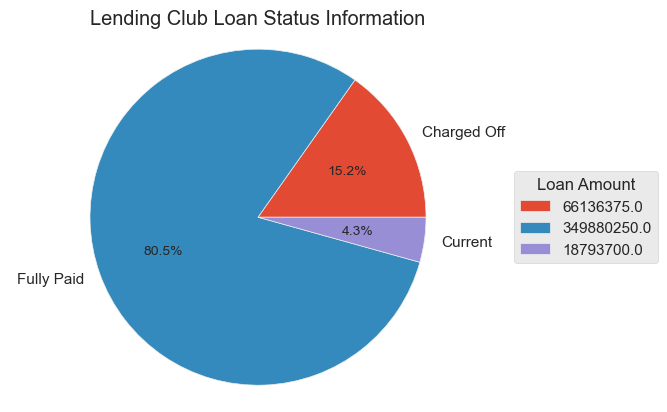

In [123]:
# Plotting a Pie Chart for different types of loan_status
chargedOffLoans = loan.loc[(loan['loan_status'] == "Charged Off")]
currentLoans = loan.loc[(loan['loan_status'] == "Current")]
fullyPaidLoans = loan.loc[(loan['loan_status'] == "Fully Paid")]

loan_data = [{"Charged Off": chargedOffLoans["funded_amnt"].sum(), "Fully Paid": fullyPaidLoans["funded_amnt"].sum(), "Current": currentLoans["funded_amnt"].sum()}]

total = pd.DataFrame(loan_data)
chargedOffTotal = float(total["Charged Off"])
fullyPaidTotal = float(total["Fully Paid"])
curretTotal = float(total["Current"])

loan_sts = [chargedOffTotal, fullyPaidTotal, curretTotal]
sts_labels = ["Charged Off", "Fully Paid", "Current"]

plt.pie(loan_sts, labels = sts_labels, autopct='%1.1f%%')
plt.title("Lending Club Loan Status Information")
plt.axis('equal')

plt.legend(loan_sts,title="Loan Amount",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()



In [59]:
# From the above Pie Chart, we can understand that 80.5% loans are fully paid, 15.2% are Charged Off and 4.3 % are Current

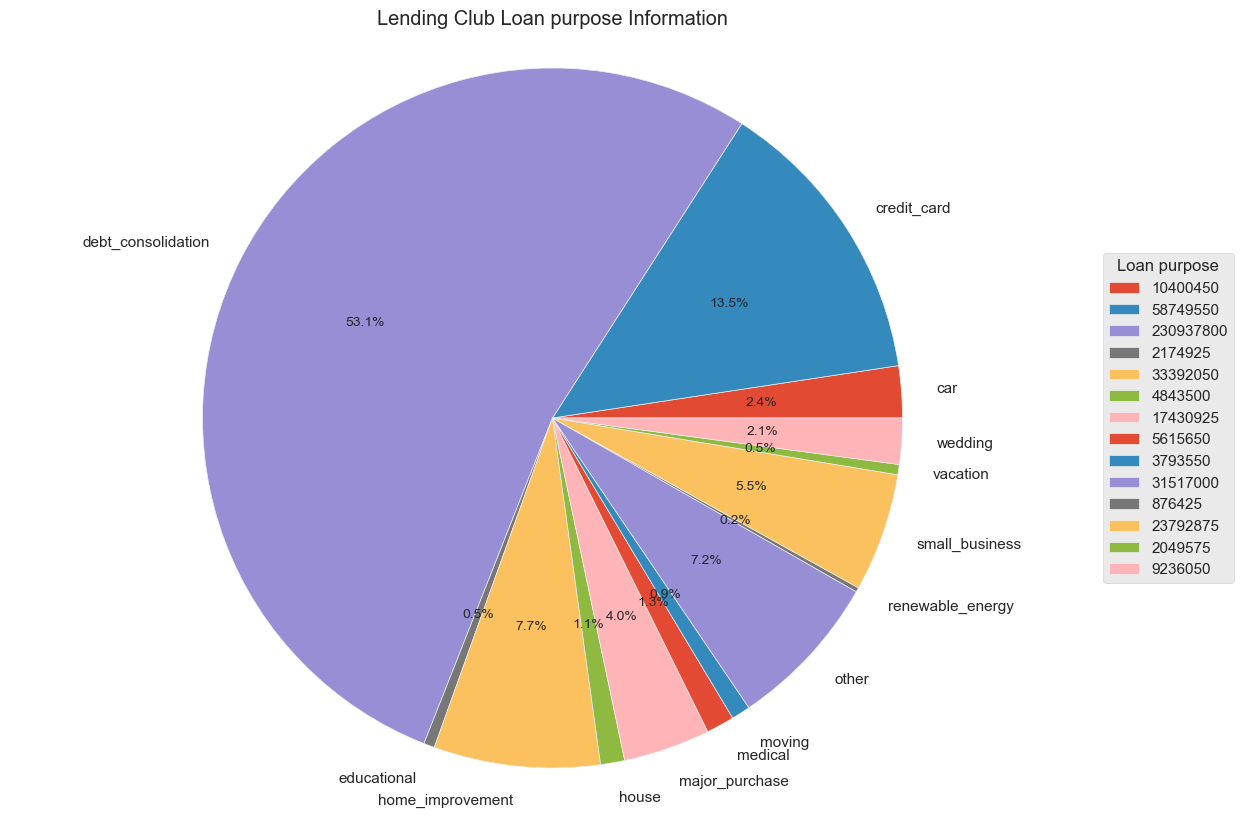

In [124]:
# Plotting a Pie chart to view the various types of purpose

ln_purpose = loan.groupby(["purpose"])['funded_amnt'].sum().reset_index()
plt.figure(figsize=(14,10))
plt.pie(ln_purpose["funded_amnt"], labels=ln_purpose["purpose"], autopct='%1.1f%%')

plt.title('Lending Club Loan purpose Information')
plt.axis('equal')
plt.legend(ln_purpose["funded_amnt"],title="Loan purpose",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [125]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

In [126]:
# Removing the rows with missing values for emp_length and revol_util
loan.dropna(axis = 0, subset=["emp_length"], inplace=True)
loan.dropna(axis = 0, subset=["revol_util"], inplace=True)

In [127]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38595 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38595 non-null  int64  
 1   funded_amnt          38595 non-null  int64  
 2   term                 38595 non-null  object 
 3   int_rate             38595 non-null  object 
 4   installment          38595 non-null  float64
 5   grade                38595 non-null  object 
 6   sub_grade            38595 non-null  object 
 7   emp_length           38595 non-null  object 
 8   home_ownership       38595 non-null  object 
 9   annual_inc           38595 non-null  float64
 10  verification_status  38595 non-null  object 
 11  issue_d              38595 non-null  object 
 12  loan_status          38595 non-null  object 
 13  purpose              38595 non-null  object 
 14  addr_state           38595 non-null  object 
 15  dti                  38595 non-null 

In [128]:
loan['int_rate'] = pd.to_numeric(loan['int_rate'])

In [131]:
loan['term'] = pd.to_numeric(loan['term'])
loan['revol_util'] = pd.to_numeric(loan['revol_util'])

In [132]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38595 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38595 non-null  int64  
 1   funded_amnt          38595 non-null  int64  
 2   term                 38595 non-null  int64  
 3   int_rate             38595 non-null  float64
 4   installment          38595 non-null  float64
 5   grade                38595 non-null  object 
 6   sub_grade            38595 non-null  object 
 7   emp_length           38595 non-null  object 
 8   home_ownership       38595 non-null  object 
 9   annual_inc           38595 non-null  float64
 10  verification_status  38595 non-null  object 
 11  issue_d              38595 non-null  object 
 12  loan_status          38595 non-null  object 
 13  purpose              38595 non-null  object 
 14  addr_state           38595 non-null  object 
 15  dti                  38595 non-null 

In [133]:
# Removing the rows with loan_status="Current", as we cannot use the current loans to predict defaulters
loan = loan[loan['loan_status'] != "Current"]

In [168]:
# update loan_status as Fully Paid to 0 and Charged Off to 1
loan["loan_status"] = loan["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)

In [134]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37497 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37497 non-null  int64  
 1   funded_amnt          37497 non-null  int64  
 2   term                 37497 non-null  int64  
 3   int_rate             37497 non-null  float64
 4   installment          37497 non-null  float64
 5   grade                37497 non-null  object 
 6   sub_grade            37497 non-null  object 
 7   emp_length           37497 non-null  object 
 8   home_ownership       37497 non-null  object 
 9   annual_inc           37497 non-null  float64
 10  verification_status  37497 non-null  object 
 11  issue_d              37497 non-null  object 
 12  loan_status          37497 non-null  object 
 13  purpose              37497 non-null  object 
 14  addr_state           37497 non-null  object 
 15  dti                  37497 non-null 

In [135]:
# Looking at the quantile values to find outliers
loan.describe()

loan_amnt   funded_amnt          term      int_rate   installment  \
count  37497.000000  37497.000000  37497.000000  37497.000000  37497.000000   
mean   11127.362856  10861.260234     41.923034     11.958772    324.858107   
std     7353.972102   7096.151309     10.347625      3.682062    208.906836   
min      500.000000    500.000000     36.000000      5.420000     15.690000   
25%     5500.000000   5400.000000     36.000000      8.940000    167.530000   
50%    10000.000000   9600.000000     36.000000     11.830000    280.260000   
75%    15000.000000  15000.000000     36.000000     14.420000    429.350000   
max    35000.000000  35000.000000     60.000000     24.400000   1305.190000   

         annual_inc           dti   delinq_2yrs  inq_last_6mths      open_acc  \
count  3.749700e+04  37497.000000  37497.000000    37497.000000  37497.000000   
mean   6.943653e+04     13.288131      0.147078        0.872390      9.304264   
std    6.467208e+04      6.659208      0.493230        1.071211      4.394866   
min    4.000000e+03      0.000000      0.000000        0.000000      2.000000   
25%    4.100000e+04      8.160000      0.000000        0.000000      6.000000   
50%    6.000000e+04     13.390000      0.000000        1.000000      9.000000   
75%    8.300000e+04     18.550000      0.000000        1.000000     12.000000   
max    6.000000e+06     29.990000     11.000000        8.000000     44.000000   

            pub_rec    revol_util     total_acc  
count  37497.000000  37497.000000  37497.000000  
mean       0.053738     48.861742     22.098035  
std        0.234659     28.341493     11.413448  
min        0.000000      0.000000      2.000000  
25%        0.000000     25.400000     13.000000  
50%        0.000000     49.300000     20.000000  
75%        0.000000     72.400000     29.000000  
max        4.000000     99.900000     90.000000

In [137]:
# From the above, we can infer the following :
# for annual_inc, the max is 6000000, 75th percentile is much smaller 83000 and mean is 69436. So we need to remove outliers
annual_inc_out = loan['annual_inc'].quantile(0.99)
loan = loan[loan['annual_inc'] < annual_inc_out]

In [143]:
perc = [.25, .50, .75, .90, .95, .999]
loan.describe(percentiles=perc)

loan_amnt   funded_amnt          term      int_rate   installment  \
count  36970.000000  36970.000000  36970.000000  36970.000000  36970.000000   
mean   11032.052340  10770.289424     41.912686     11.936445    321.959974   
std     7268.030032   7014.076380     10.341542      3.667626    206.017724   
min      500.000000    500.000000     36.000000      5.420000     15.690000   
25%     5400.000000   5300.000000     36.000000      8.940000    166.830000   
50%     9800.000000   9600.000000     36.000000     11.805000    278.510000   
75%    15000.000000  15000.000000     36.000000     14.350000    424.560000   
90%    21000.000000  20000.000000     60.000000     16.770000    616.720000   
95%    25000.000000  25000.000000     60.000000     18.300000    746.660000   
99.9%  35000.000000  35000.000000     60.000000     23.130000   1223.950000   
max    35000.000000  35000.000000     60.000000     24.400000   1305.190000   

          annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count   36970.000000  36970.000000  36970.000000    36970.000000   
mean    65845.602526     13.341522      0.145740        0.867974   
std     35096.002978      6.646438      0.490896        1.067909   
min      4000.000000      0.000000      0.000000        0.000000   
25%     40863.000000      8.230000      0.000000        0.000000   
50%     59000.000000     13.440000      0.000000        1.000000   
75%     81198.300000     18.590000      0.000000        1.000000   
90%    112000.800000     22.320000      1.000000        2.000000   
95%    135000.000000     23.815500      1.000000        3.000000   
99.9%  225000.000000     29.430000      5.000000        7.000000   
max    234996.000000     29.990000     11.000000        8.000000   

           open_acc       pub_rec    revol_util     total_acc  
count  36970.000000  36970.000000  36970.000000  36970.000000  
mean       9.233946      0.054152     48.893850     21.855450  
std        4.283830      0.235344     28.317417     11.089179  
min        2.000000      0.000000      0.000000      2.000000  
25%        6.000000      0.000000     25.500000     13.000000  
50%        9.000000      0.000000     49.400000     20.000000  
75%       12.000000      0.000000     72.400000     29.000000  
90%       15.000000      0.000000     87.800000     37.000000  
95%       17.000000      1.000000     93.600000     43.000000  
99.9%     27.000000      2.000000     99.800000     61.000000  
max       29.000000      4.000000     99.900000     62.000000

In [142]:
# looking at the 99.9th percentile, we can see that open_acc and total_acc have outliers. We will remove .1 % data from each.
open_acc_out = loan['open_acc'].quantile(0.999)
loan = loan[loan['open_acc'] < open_acc_out]

total_acc_out = loan['total_acc'].quantile(0.999)
loan = loan[loan['total_acc'] < total_acc_out]

In [144]:
loan

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  \
0           5000         5000    36     10.65       162.87     B        B2   
1           2500         2500    60     15.27        59.83     C        C4   
2           2400         2400    36     15.96        84.33     C        C5   
3          10000        10000    36     13.49       339.31     C        C1   
5           5000         5000    36      7.90       156.46     A        A4   
...          ...          ...   ...       ...          ...   ...       ...   
39712       2500         2500    36      8.07        78.42     A        A4   
39713       8500         8500    36     10.28       275.38     C        C1   
39714       5000         5000    36      8.07       156.84     A        A4   
39715       5000         5000    36      7.43       155.38     A        A2   
39716       7500         7500    36     13.75       255.43     E        E2   

      emp_length home_ownership  annual_inc  ...             purpose  \
0             10           RENT     24000.0  ...         credit_card   
1              1           RENT     30000.0  ...                 car   
2             10           RENT     12252.0  ...      small_business   
3             10           RENT     49200.0  ...               other   
5              3           RENT     36000.0  ...             wedding   
...          ...            ...         ...  ...                 ...   
39712          4       MORTGAGE    110000.0  ...    home_improvement   
39713          3           RENT     18000.0  ...         credit_card   
39714          1       MORTGAGE    100000.0  ...  debt_consolidation   
39715          1       MORTGAGE    200000.0  ...               other   
39716          1            OWN     22000.0  ...  debt_consolidation   

      addr_state    dti delinq_2yrs earliest_cr_line  inq_last_6mths  \
0             AZ  27.65           0           Jan-85               1   
1             GA   1.00           0           Apr-99               5   
2             IL   8.72           0           Nov-01               2   
3             CA  20.00           0           Feb-96               1   
5             AZ  11.20           0           Nov-04               3   
...          ...    ...         ...              ...             ...   
39712         CO  11.33           0           Nov-90               0   
39713         NC   6.40           1           Dec-86               1   
39714         MA   2.30           0           Oct-98               0   
39715         MD   3.72           0           Nov-88               0   
39716         MA  14.29           1           Oct-03               0   

       open_acc pub_rec  revol_util  total_acc  
0             3       0        83.7          9  
1             3       0         9.4          4  
2             2       0        98.5         10  
3            10       0        21.0         37  
5             9       0        28.3         12  
...         ...     ...         ...        ...  
39712        13       0        13.1         40  
39713         6       0        26.9          9  
39714        11       0        19.4         20  
39715        17       0         0.7         26  
39716         7       0        51.5          8  

[36970 rows x 23 columns]

In [145]:
loan['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 36970, dtype: object

In [146]:
loan['earliest_cr_line']

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
5        Nov-04
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 36970, dtype: object

In [147]:
def correctdate(date):
    year = date.split("-")[0]
    if(len(year)==1):
        date = "0"+date
    return date
from datetime import datetime
loan["issue_d"] = loan['issue_d'].apply(lambda x: correctdate(x))
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)

In [149]:
loan['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 36970, dtype: datetime64[ns]

In [150]:
# Creating bins for loan_amt

bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_lbl = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=bucket_lbl)

# Creating bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_lbl = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=bucket_lbl)

# Creatinng bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_lbl = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=bucket_lbl)
# create bins for installment range
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

loan['installment'] = loan['installment'].apply(lambda x: installment(x))

# Creating bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_lbl = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loan['dti_range'] = pd.cut(loan['dti'], bins, labels=bucket_lbl)

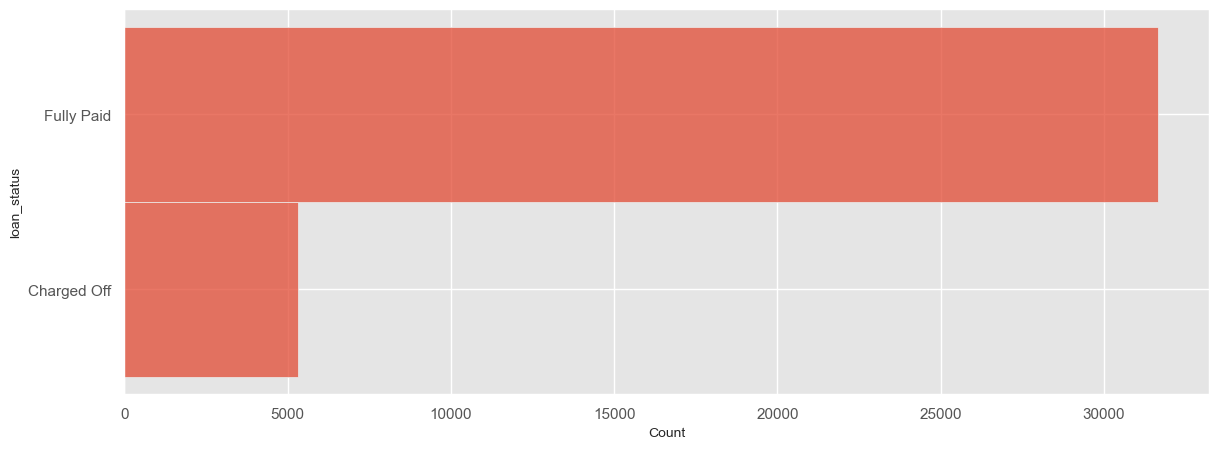

In [159]:
# Checking the number of defaults in the data using histplot
plt.figure(figsize=(14,5))
sns.histplot(y="loan_status", data=loan)
plt.show()

In [156]:
print((loan['loan_status']=="Charged Off").sum())

5319


In [160]:
# function for plotting the countplot 
# The input will be feature and it will plot with respect to loan default
def plotUnivariateRatioBar(feature, data=loan, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status"]==1])
        feature_values.append(feature_count*100/feature_filter["loan_status"].count())
    plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    plt.show()
    
# function to plot univariate with default status scale 0 - 1
def plotUnivariateBar(x, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', data=loan)
    plt.title("Loan Defaults wrt "+str(x)+" feature - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

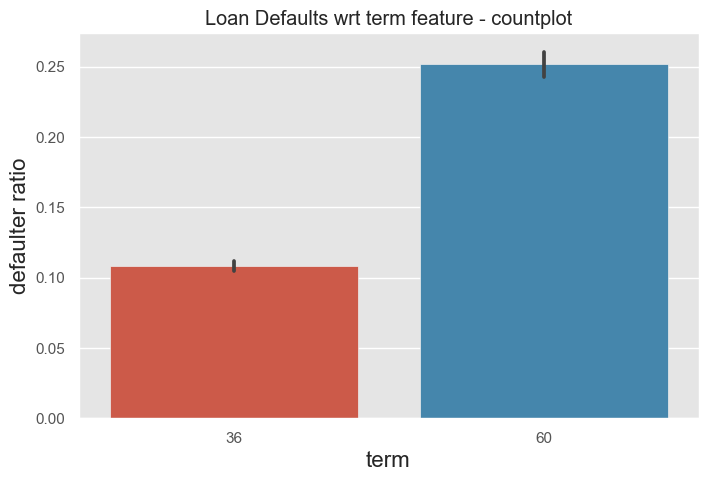

In [169]:
# check for defaulters wrt term in the data using countplot
plotUnivariateBar("term", figsize=(8,5))

In [204]:
# From the above plot, we can see that the defaulter rate is higher for loan term of 60 months
# This we can say that "term" is useful

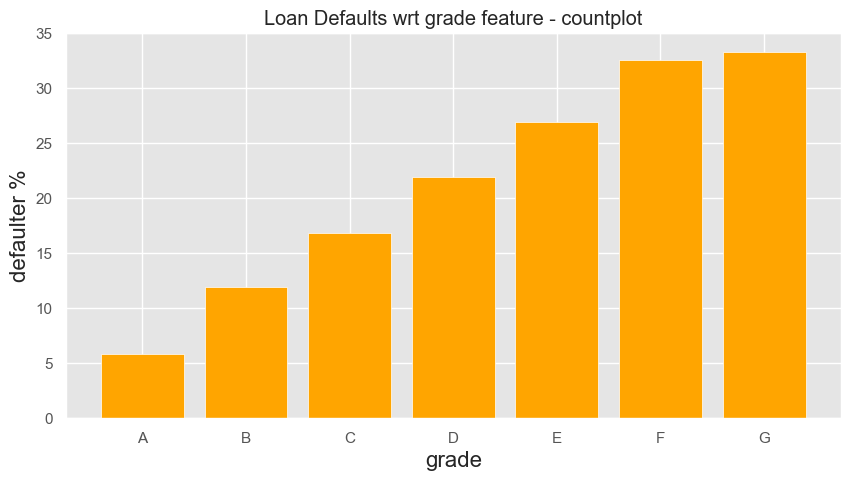

In [170]:
# check for defaulters wrt grade in the data using countplot
plotUnivariateRatioBar("grade")

In [ ]:
# From the above chart, we can see that the defaulter rate is increasing as we move from grade A to Grade G.
# Thus, we can infer that "grade" is useful

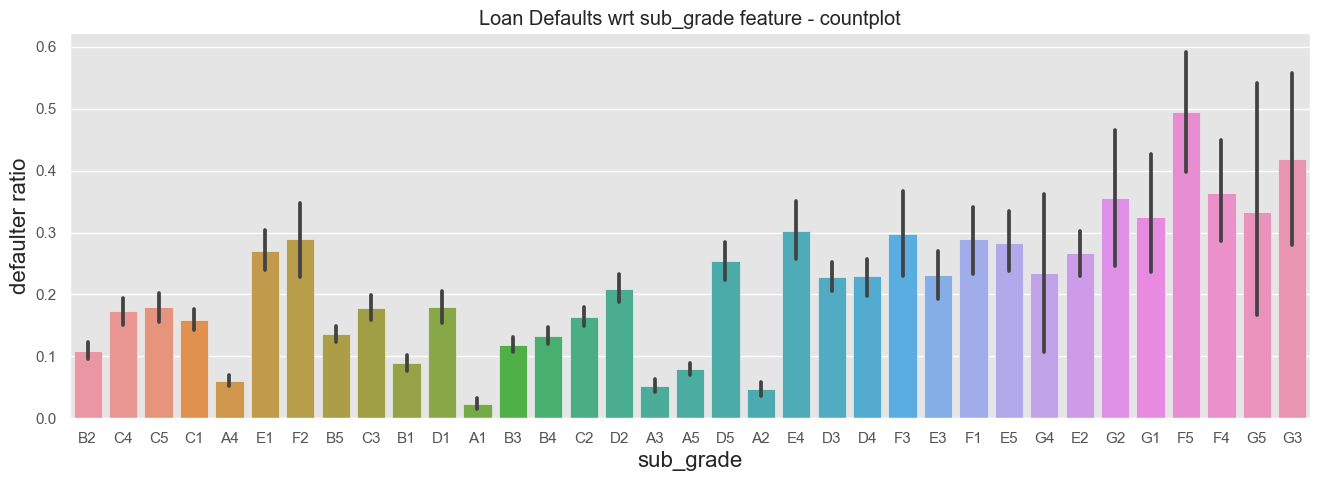

In [171]:
# check for defaulters wrt sub_grade in the data using countplot
plotUnivariateBar("sub_grade", figsize=(16,5))

In [ ]:
# From the above chart also, we can se that defaulter rate increases with he sub_grade.
# Thus, "sub_grade" is useful

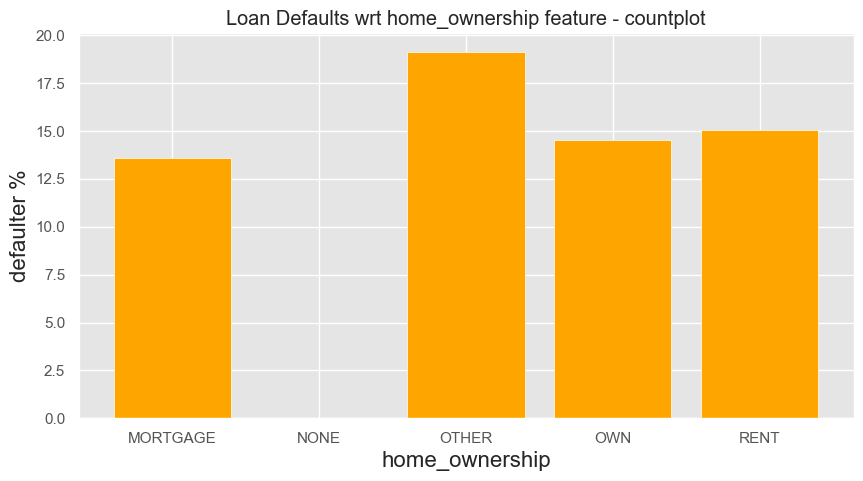

In [172]:
# check for defaulters wrt home_ownership in the data 
plotUnivariateRatioBar("home_ownership")

In [ ]:
# From the above chart, we can see that there is no increase in defaulters related to home ownership. There is an incease for "Others", but others data cannot be considered to be accurate.
# Thus, we can infer that "home_ownership" is not useful

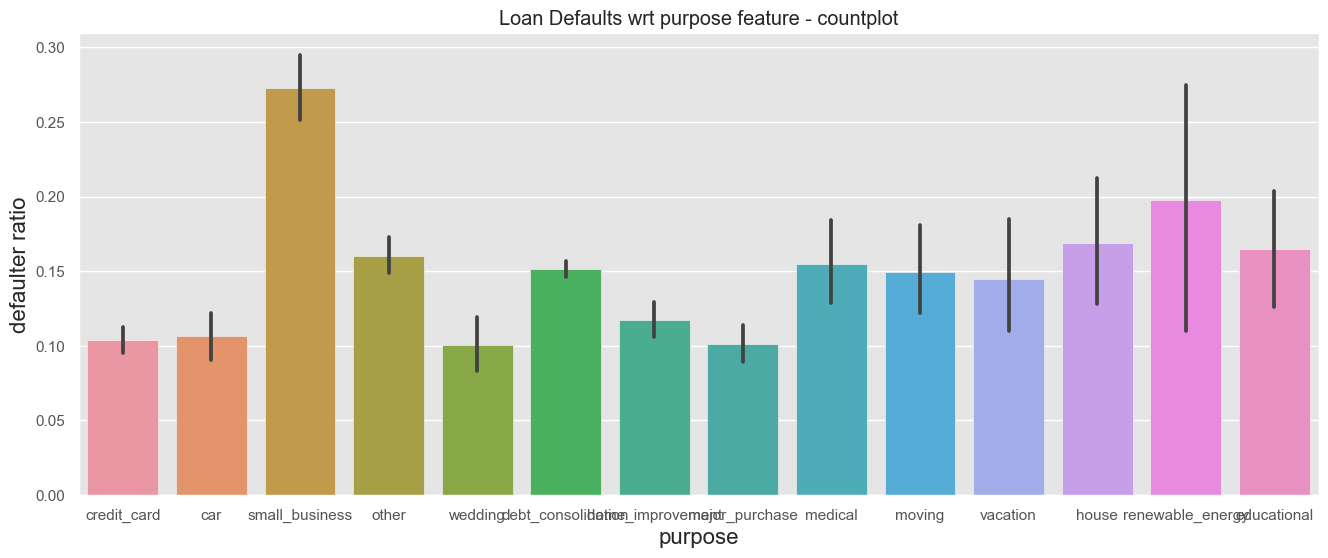

In [173]:
# check for defaulters wrt purpose in the data using countplot
plotUnivariateBar("purpose", figsize=(16,6))

In [ ]:
# From the above chart, we can see that the rate is almost constant for all purpose, except for "small_business"
# Thus, "purpose" is useful

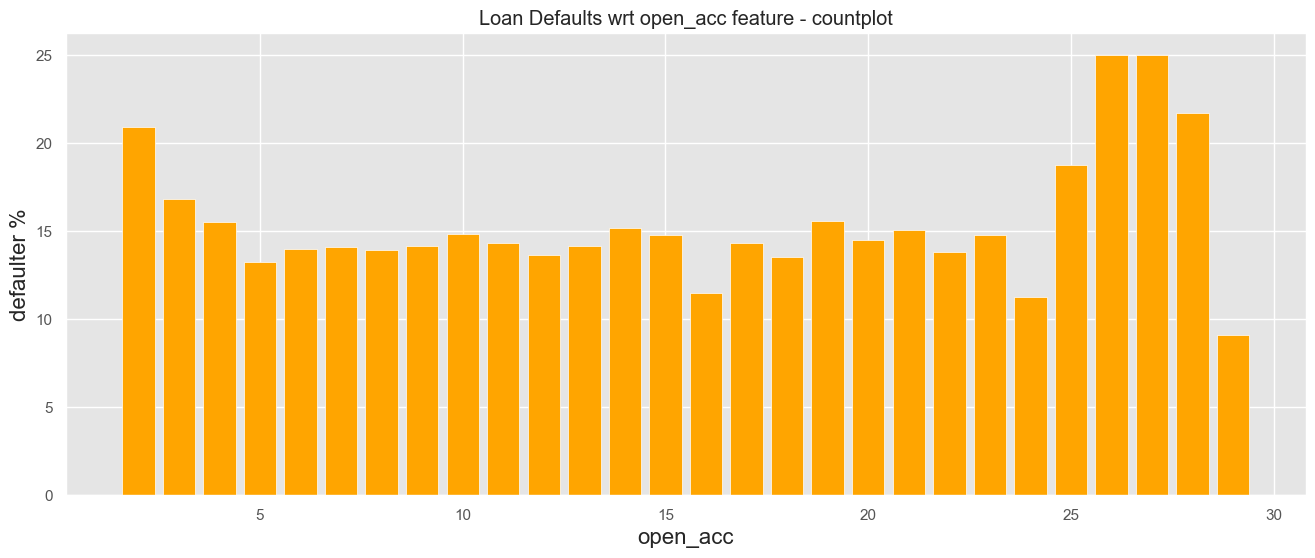

In [174]:
# check for defaulters wrt open_acc in the data using countplot
plotUnivariateRatioBar("open_acc", figsize=(16,6))

In [ ]:
# From the above chart, we can see that the defauler rate is almost constant 
# Thus "open_acc" is not useful

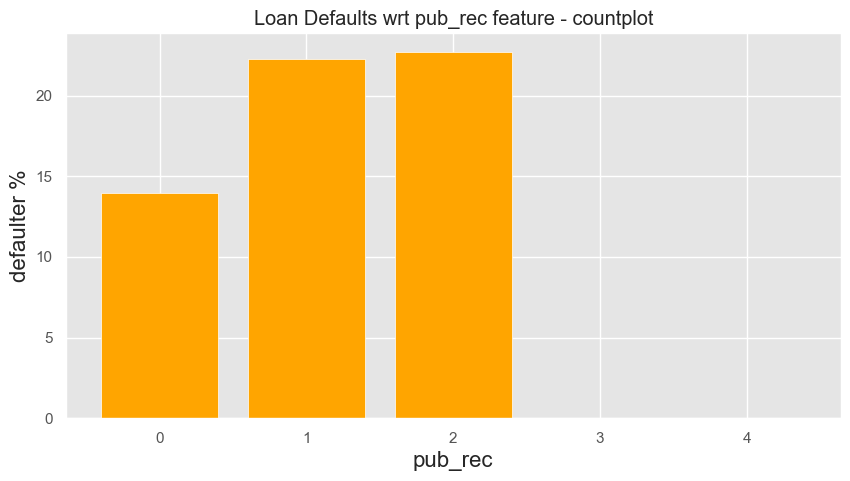

In [175]:
# check for defaulters wrt pub_rec in the data using countplot
plotUnivariateRatioBar("pub_rec")

In [206]:
# We can see from th above chrt that the rate of defaulters rises by > 5% for pub_rec > 0.
# Thus, we will consider this as useful.

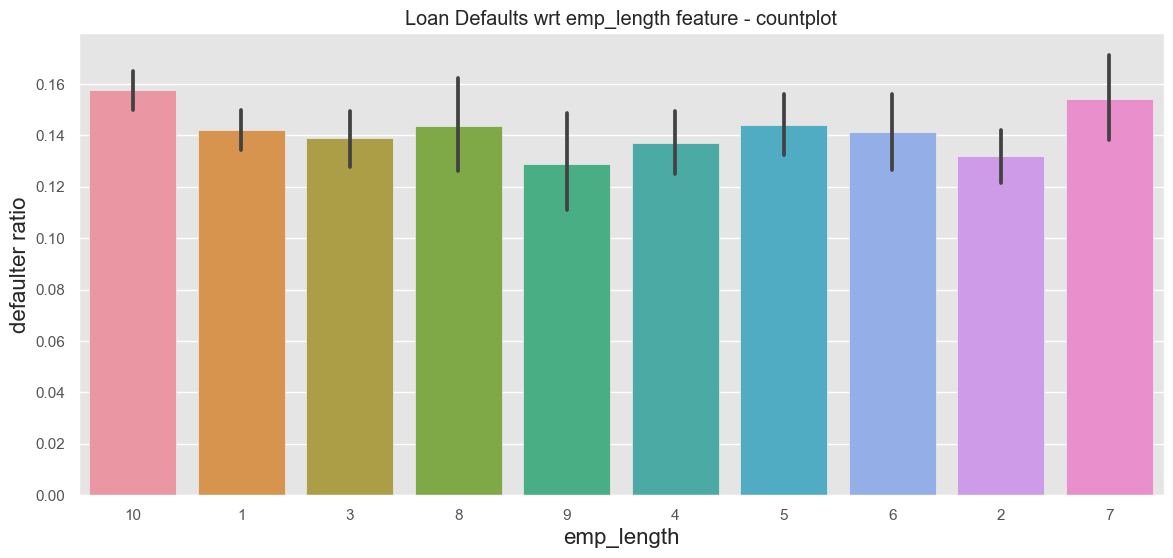

In [176]:
# check for defaulters wrt emp_length in the data using countplot
plotUnivariateBar("emp_length", figsize=(14,6))

In [205]:
# From the above chart, we can see that the defaulter rate is nearly constant accross all values of emp_length
# Tus, we will consider "emp_length" as not useful

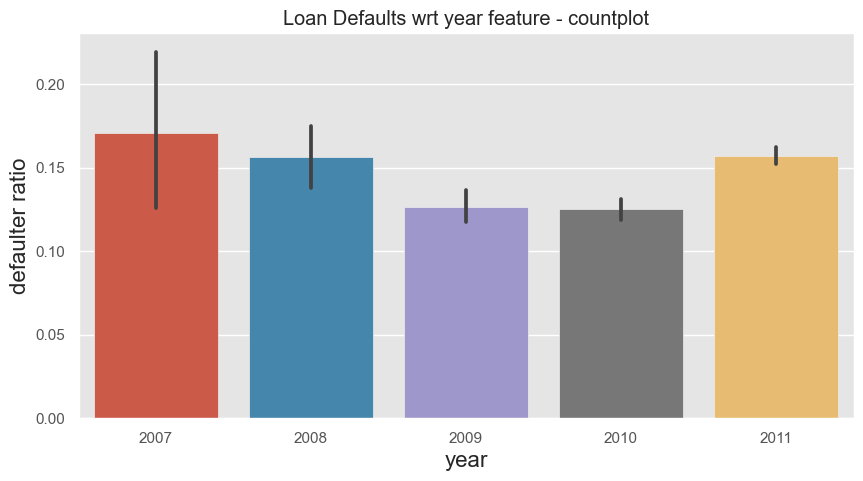

In [177]:
# check for defaulters wrt year in the data using countplot
plotUnivariateBar("year")

In [207]:
# Frm the above chart we can see that the defaulter rate is almost constant accross the years
# Thus we will conider this as not useful

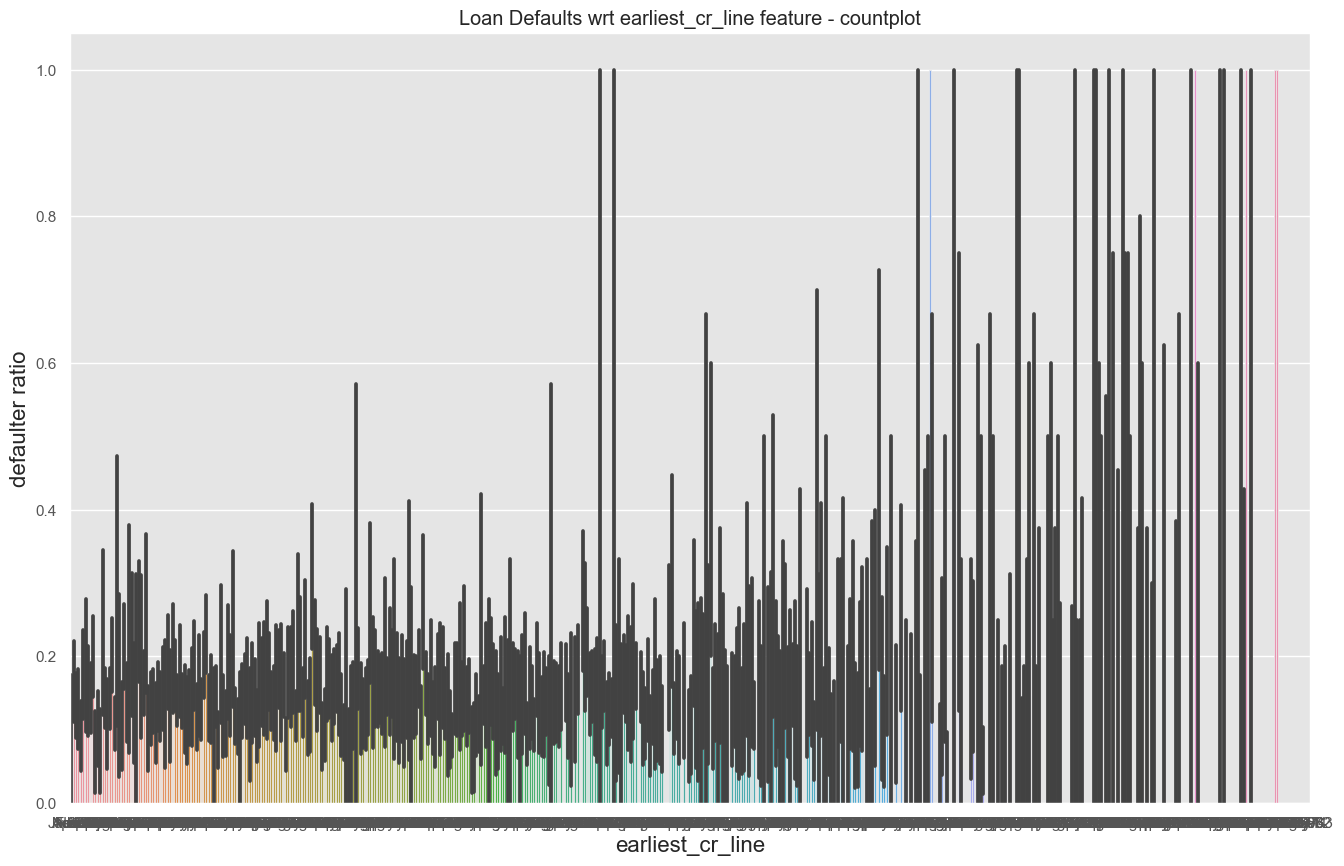

In [178]:
# check for defaulters wrt earliest_cr_line in the data
plotUnivariateBar("earliest_cr_line", figsize=(16,10))

In [ ]:
# From the above chart, we can infer that the defaulter rate is almost constant
#Thus we can consider the "earliest_cr_line" as not useful

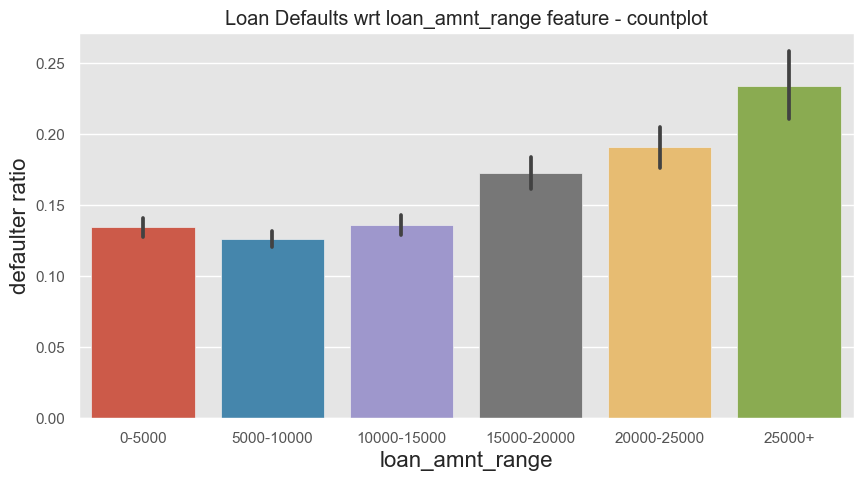

In [179]:
# check for defaulters wrt loan_amnt_range in the data using countplot
plotUnivariateBar("loan_amnt_range")

In [208]:
# From above chart, we can infer that the defaulters rate is increasing loan_amnt_range values, hence rate will depend on loan_amnt_range feature
# "loan_amnt_range" is useful

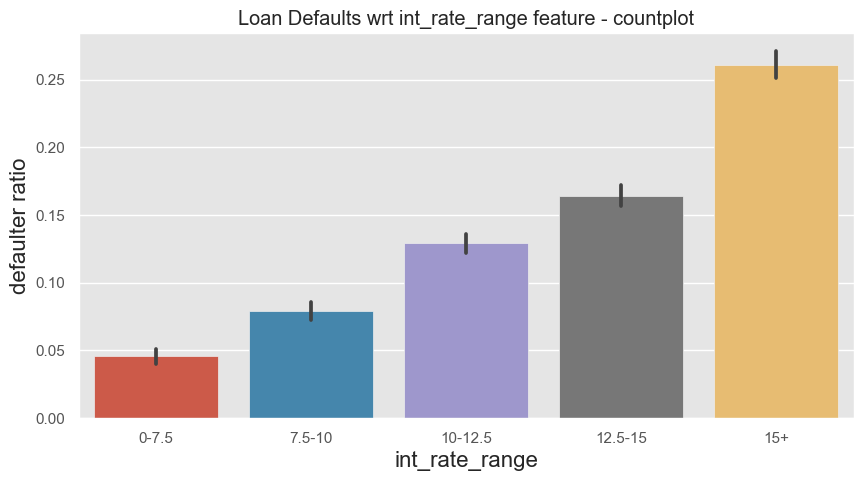

In [180]:
# check for defaulters wrt int_rate_range in the data
plotUnivariateBar("int_rate_range")

In [209]:
# We can see from the above chart that defaulter rate is ncreasing with increase in int_rate_range
# Thus we can consider "int_rate" as useful

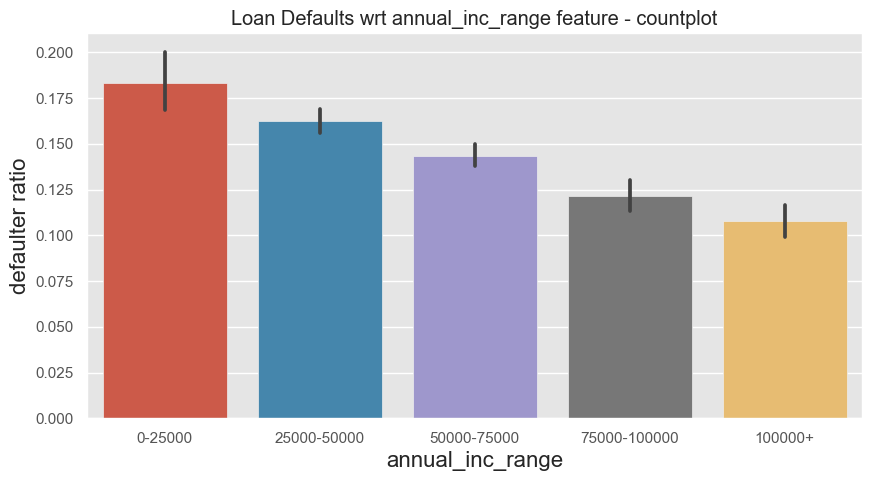

In [181]:
# check for defaulters wrt annual_inc_range in the data
plotUnivariateBar("annual_inc_range")


In [210]:
# We can se from the above char, that the defaulter rate is reducing with the increase in annual_inc_range
# Thus we can consider "annual_inc_range" as useful

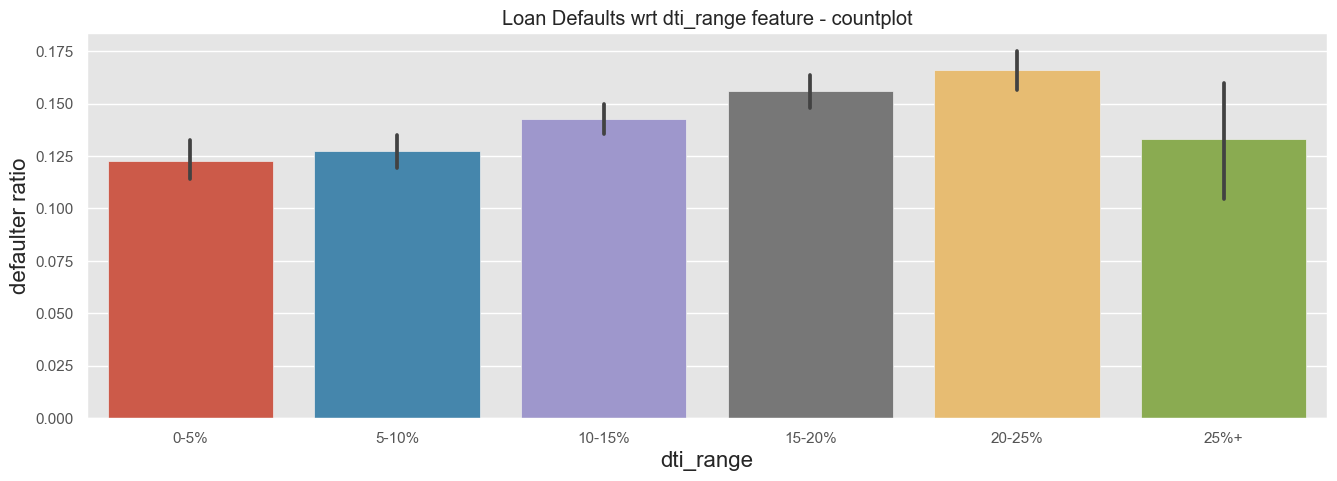

In [182]:
# check for defaulters wrt dti_range in the data using countplot
plotUnivariateBar("dti_range", figsize=(16,5))

In [211]:
# We can see from the above plot that the defaulter ratio is increaseing with increase in dti_range
# Thus we can consider "dti_range" as useful

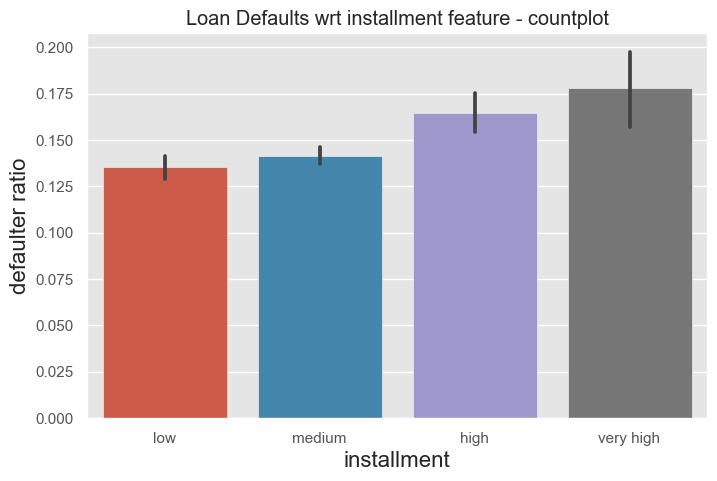

In [183]:
# check for defaulters wrt installment range in the data
plotUnivariateBar("installment", figsize=(8,5))

In [212]:
# We can see from the above chart that the defaulter ration is increasing with the increase in installment
# Thus "installment" can be considered as useful

In [214]:
# Thus, following are the important features we have deduced using univariate analysis:-
# term, grade, purpose, pub_rec, funded_amnt, int_rate, annual_inc, dti, installment

In [185]:
#Bivariate Analysis

In [186]:
# function to plot scatter plot for two features
def plotScatter(x, y):
    plt.figure(figsize=(16,6))
    sns.scatterplot(x=x, y=y, hue="loan_status", data=loan)
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
def plotBivariateBar(x, hue, figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', hue=hue, data=loan)
    plt.title("Loan Default ratio wrt "+x+" feature for hue "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

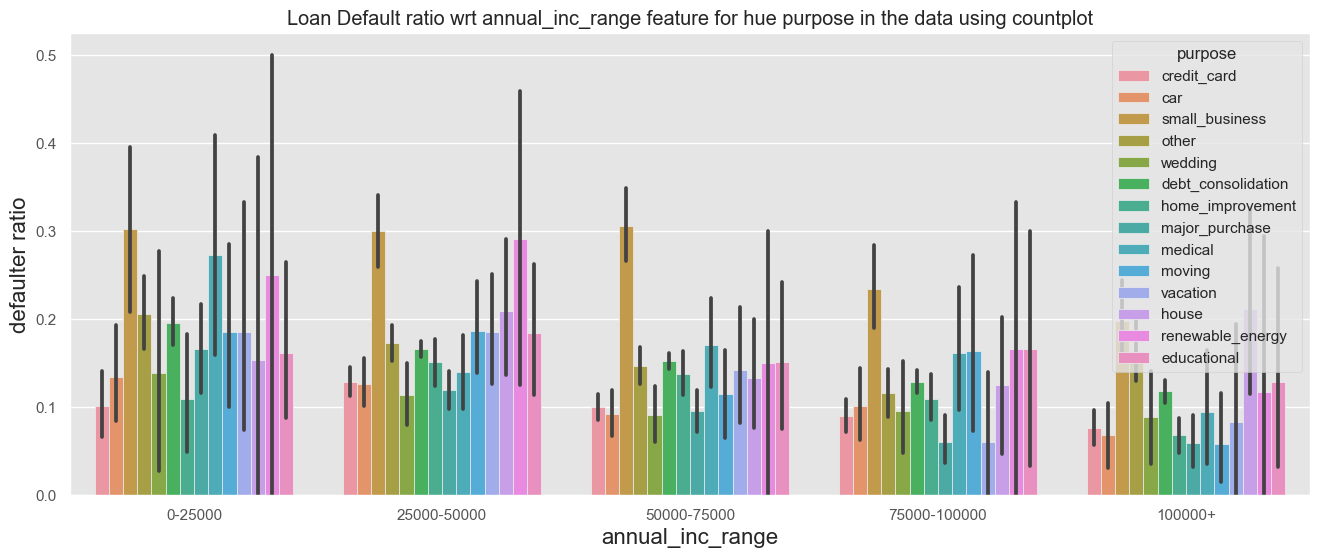

In [187]:
# check for defaulters wrt annual_inc and purpose in the data using countplot
plotBivariateBar("annual_inc_range", "purpose")

In [213]:
# From the above, we can infer that there is no correlation between the annual_income_range and purpose wrt defaulter ratio

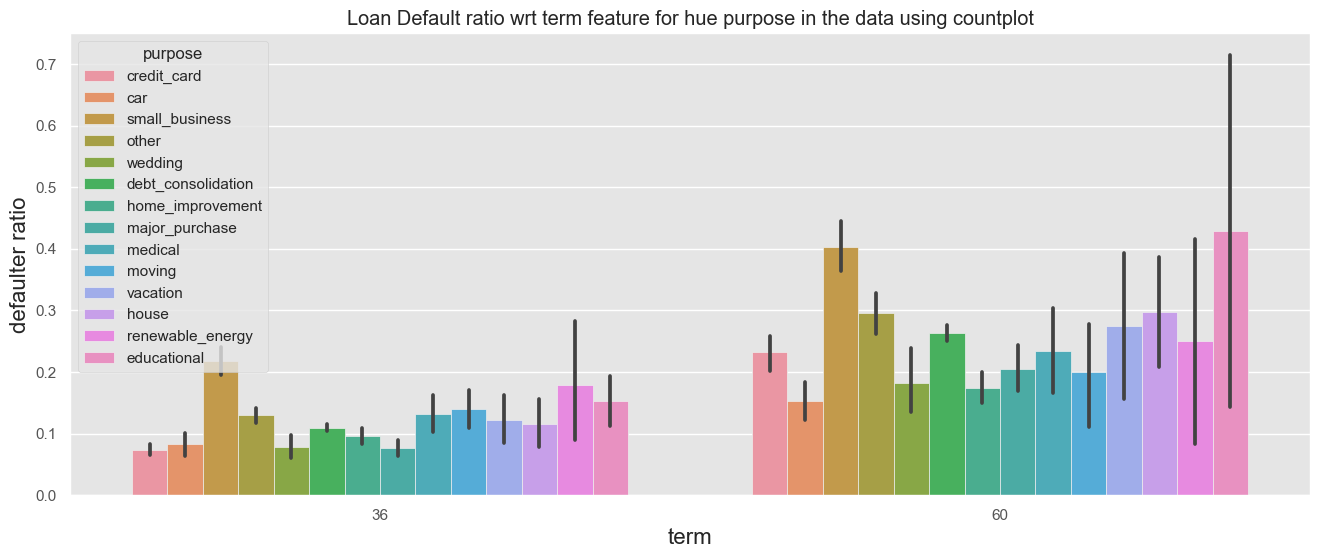

In [188]:
# check for defaulters wrt term and purpose in the data 
plotBivariateBar("term", "purpose")

In [215]:
# As we can see straight lines on the plot, default ratio increases for every purpose wrt term
# There is a relation

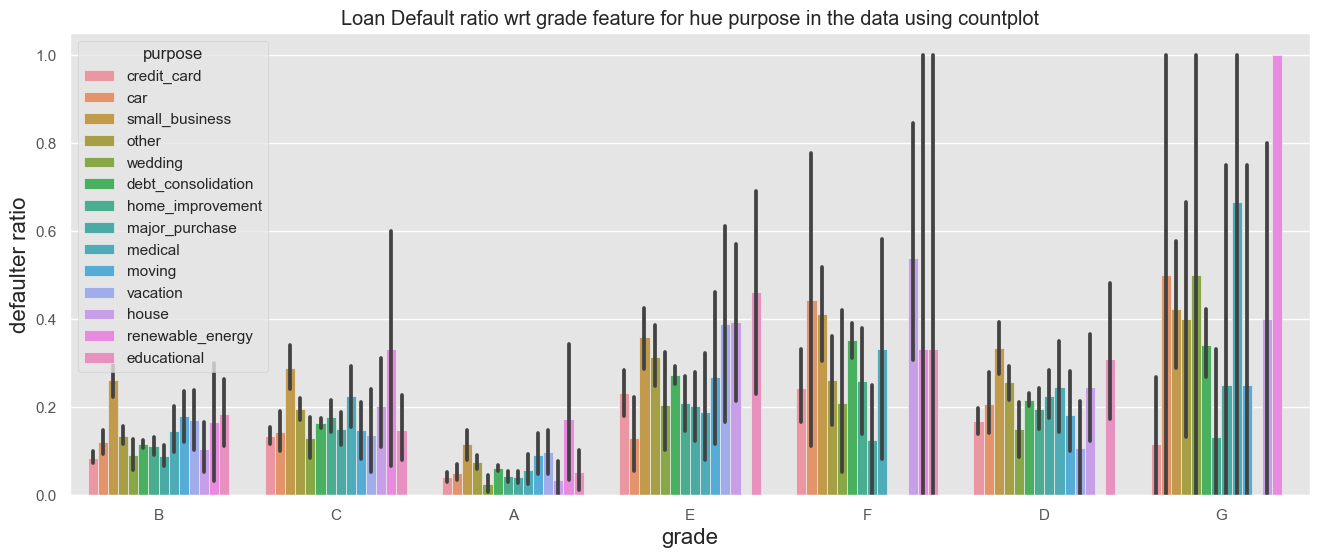

In [189]:
# check for defaulters wrt grade and purpose in the data 
plotBivariateBar("grade", "purpose")

In [216]:
# As we can see straight lines on the plot, default ratio increases for every purpose wrt grade
# There is a relation

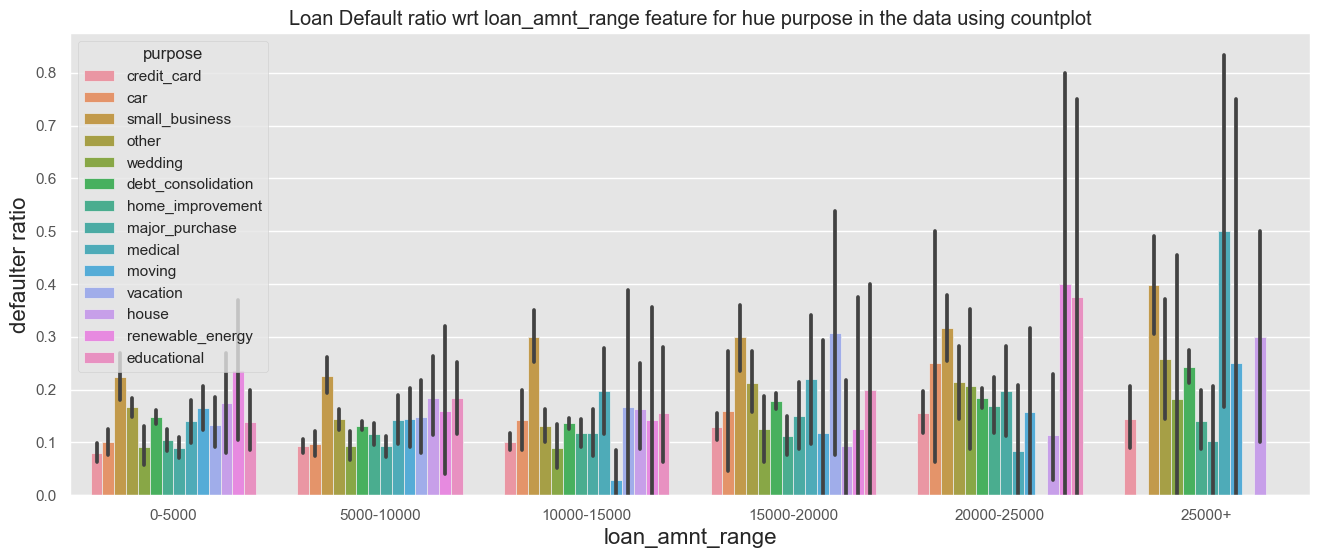

In [190]:
# check for defaulters wrt loan_amnt_range and purpose in the data
plotBivariateBar("loan_amnt_range", "purpose")

In [217]:
# As we can see straight lines on the plot, default ratio increases for every purpose wrt loan_amnt_range
# There is a relation

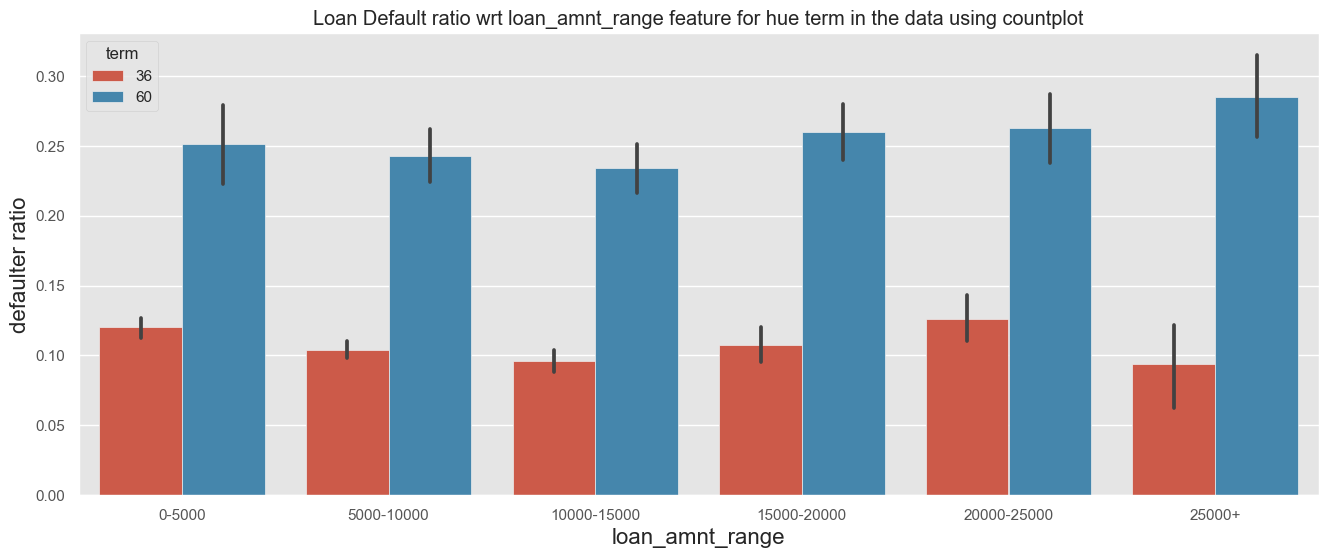

In [191]:
# check for defaulters wrt loan_amnt_range and term in the data
plotBivariateBar("loan_amnt_range", "term")

In [218]:
# As we can see straight lines on the plot, default ratio increases for every term wrt loan_amnt_range
# There is a relation

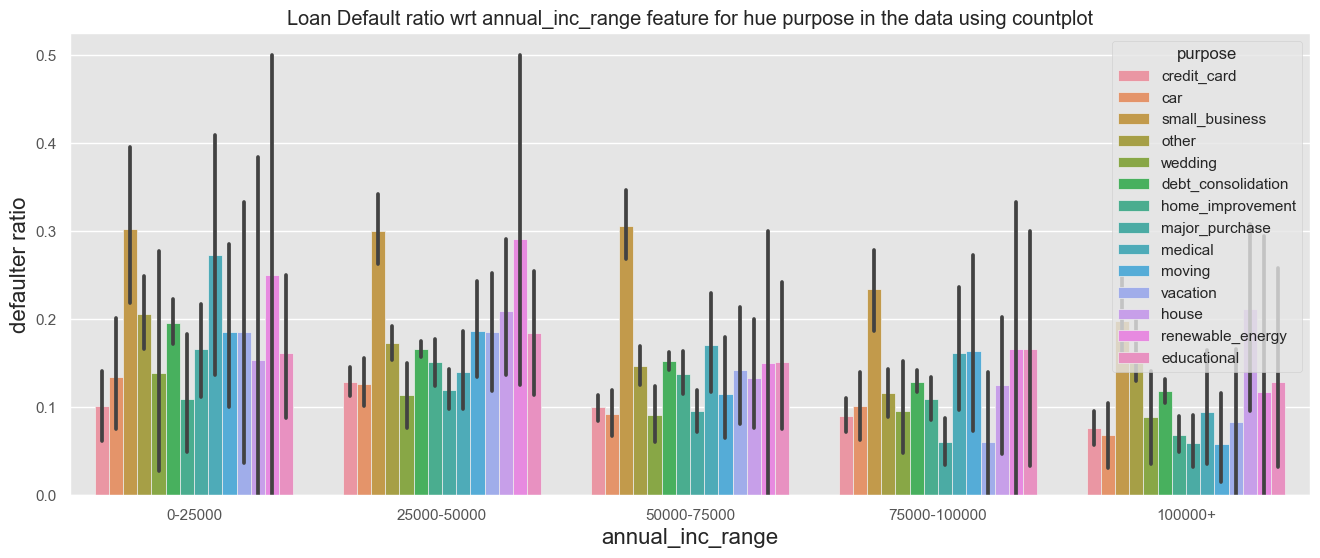

In [192]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("annual_inc_range", "purpose")

In [219]:
# As we can see straight lines on the plot, default ratio increases for every purpose wrt annual_inc_range
# There is a relation

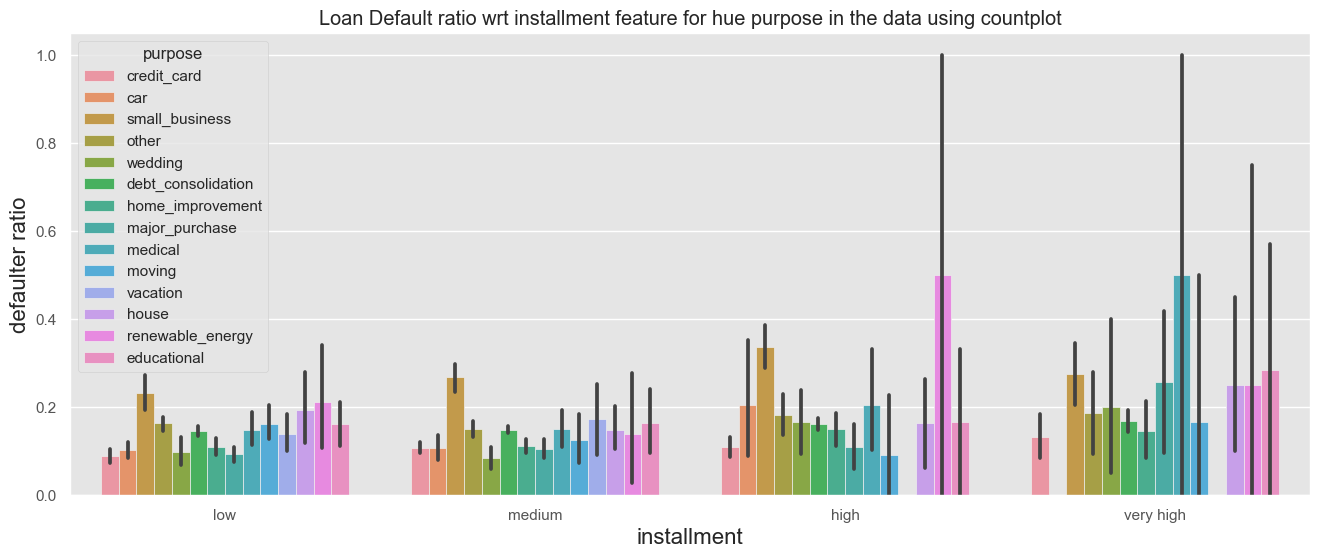

In [193]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("installment", "purpose")

In [220]:
# As we can see straight lines on the plot, default ratio increases for every purpose wrt installment except for small_business
# There is a relation

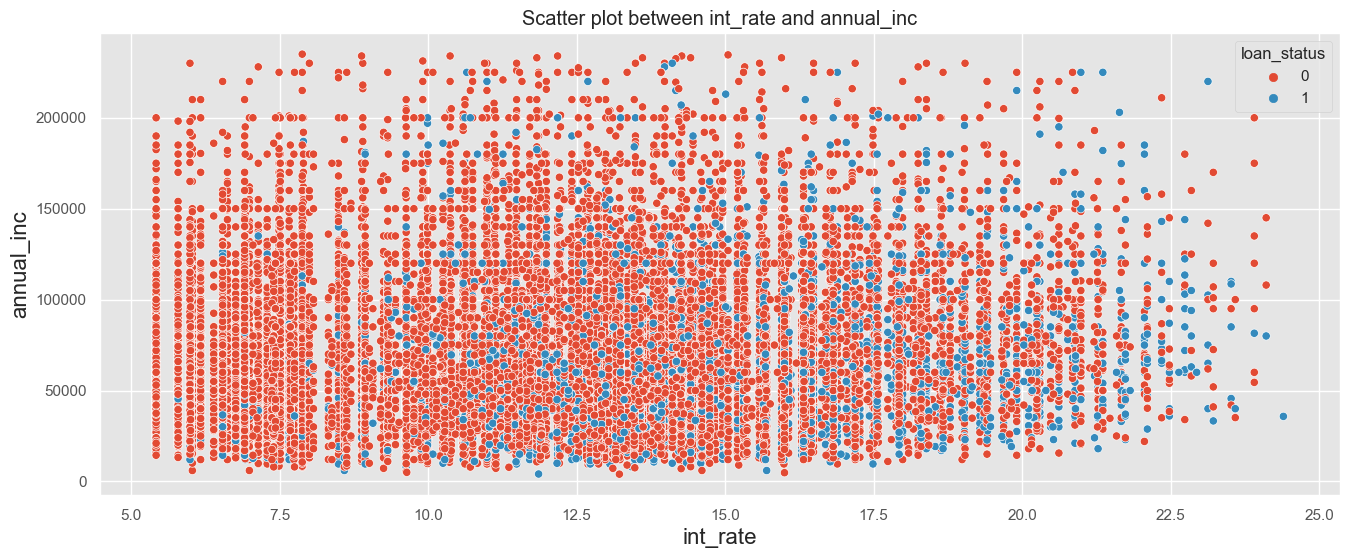

In [194]:
# check for defaulters wrt loan_amnt_range in the data
plotScatter("int_rate", "annual_inc")

In [221]:
# As we can see, there is no relation between the int_rate and annual_inc

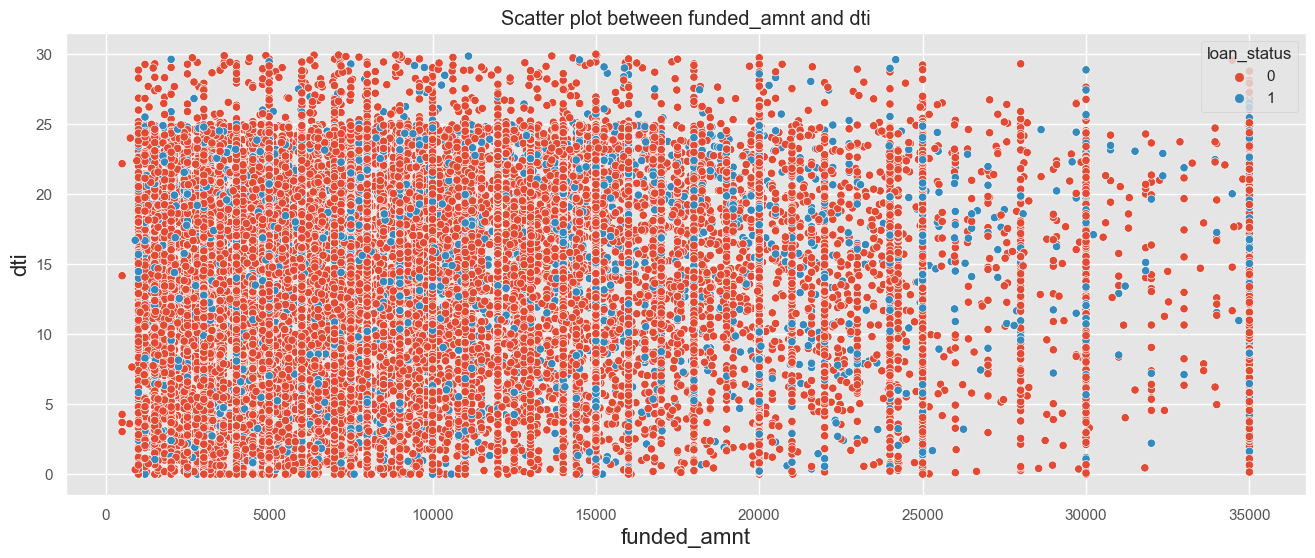

In [196]:
# plot scatter for funded_amnt_inv with dti
plotScatter("funded_amnt", "dti")

In [222]:
# As we can see straight lines on the plot, there is no relation between above mentioned features
# There is no relation

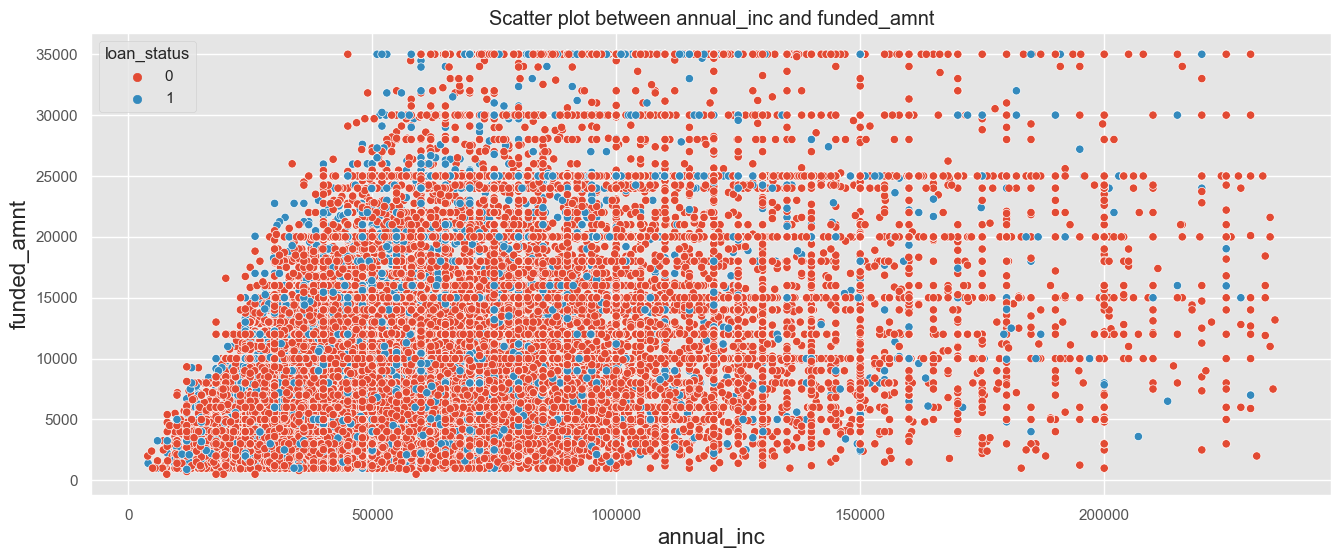

In [197]:
# plot scatter for funded_amnt_inv with annual_inc
plotScatter("annual_inc", "funded_amnt")

In [223]:
# As we can see slope pattern on the plot, there is positive relation between above mentioned features

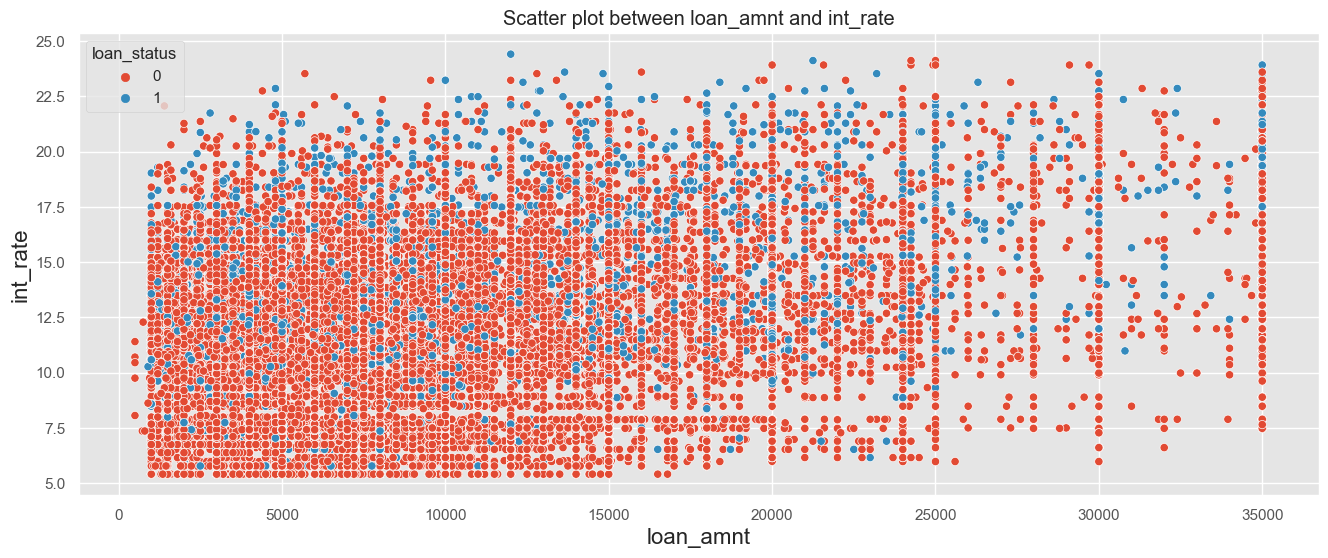

In [198]:
# plot scatter for loan_amnt with int_rate
plotScatter("loan_amnt", "int_rate")

In [224]:
# As we can see straight line patterns on the plot, there is no relation between above mentioned features

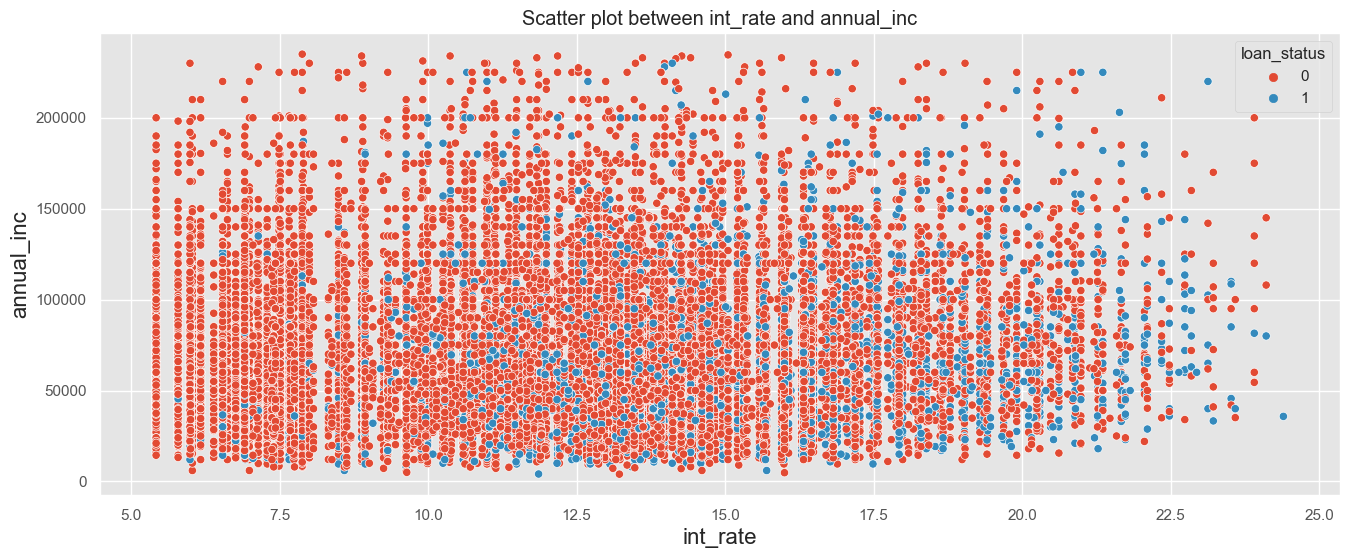

In [199]:
# plot scatter for int_rate with annual_inc
plotScatter("int_rate", "annual_inc")

In [225]:
# As we can see negative correlation pattern with reduced density on the plot, there is some relation between above mentioned features

In [ ]:
# Therefore, following are the important feature we deduced from above Bivariate analysis:
# term, grade, purpose, pub_rec, funded_amnt, int_rate, annual_inc

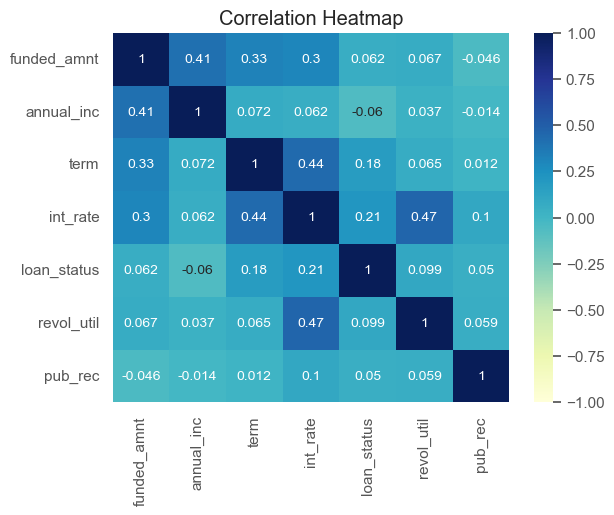

In [202]:
# plot heat map to see correlation between features
continuous_f = ["funded_amnt", "annual_inc", "term", "int_rate", "loan_status", "revol_util", "pub_rec"]
loan_corr = loan[continuous_f].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

In [226]:
# The mximum correlation as per te heat map is revol_util and int_rate which is 0.47 and term and int_rate which is 0.44
# This does not necessarily give us any diection towards defaulter rate

In [227]:
# Final Findings
# After analysing all the related features available in the dataset, we have come to an end, deducing the main driving features for the Lending Club Loan Default analysis:

# The best driving features for the Loan default analysis are: term, grade, purpose, pub_rec, int_rate, installment, annual_inc, funded_amnt